In [ ]:
# Praveen Peiris
# Student id: 1572154


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data = pd.read_csv("cardio_train.csv")



Data['age']=(Data['age']/365).astype(int)

Data = Data.dropna()
X = Data.drop(["height", "cardio"], axis=1)
y = Data["cardio"]



Data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
Data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
samples = len(Data)
print(" Number of samples = ", samples)

features = Data.shape[1]
print(" Number of features = ", features)



 Number of samples =  70000
 Number of features =  13


In [5]:
#Missing values
null_values = Data.isnull().sum()
print("Null values : ", null_values)

#Duplicates
duplicate_rows = Data[Data.duplicated()]
print("Duplicates: ", duplicate_rows)

Null values :  id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Duplicates:  Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


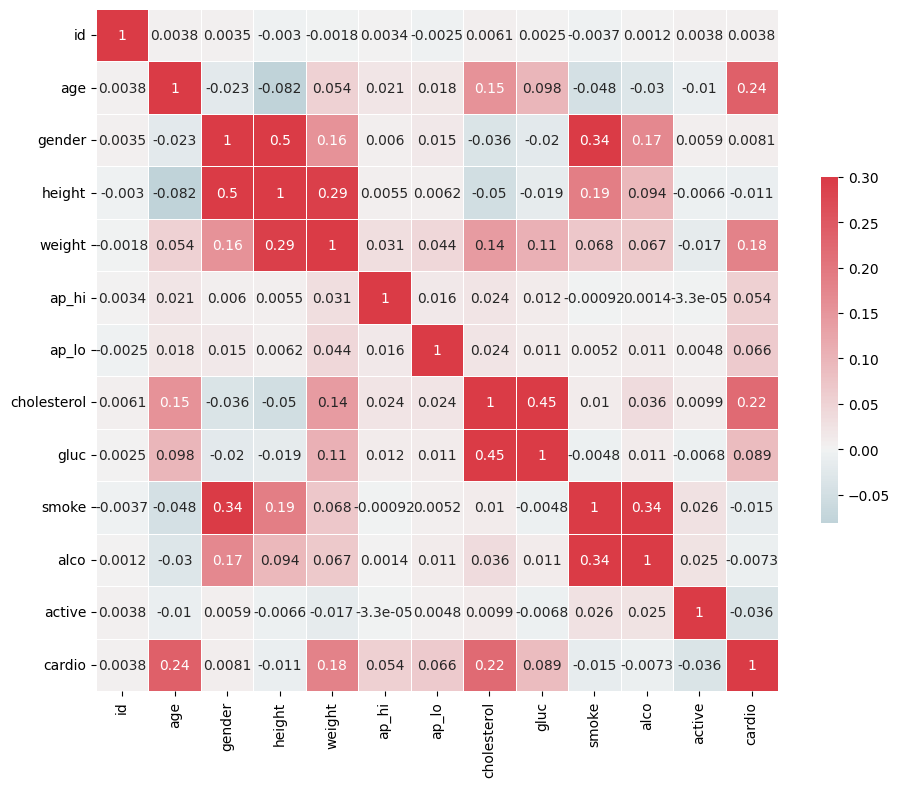

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corr = Data.corr()

# Generate a diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, color='blue', center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [7]:
#Checking for negative values
def check_all_positive(df):
    for column in df.columns:
        if not (df[column] >= 0).all():
            print(f"Column '{column}' contains non-positive values.")
        else:
            print(f"All values in column '{column}' are positive.")
check_all_positive(Data)

All values in column 'id' are positive.
All values in column 'age' are positive.
All values in column 'gender' are positive.
All values in column 'height' are positive.
All values in column 'weight' are positive.
Column 'ap_hi' contains non-positive values.
Column 'ap_lo' contains non-positive values.
All values in column 'cholesterol' are positive.
All values in column 'gluc' are positive.
All values in column 'smoke' are positive.
All values in column 'alco' are positive.
All values in column 'active' are positive.
All values in column 'cardio' are positive.


In [8]:
#Handeling duplicate values
Data_cleaned = Data[(Data >= 0).all(axis=1)]
print(Data_cleaned.shape)
Data_cleaned.head()

(69992, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# Removing outliers using z-score
from scipy.stats import zscore

z_scores = Data_cleaned.apply(zscore)

threshold = 3

outliers = (z_scores.abs() > threshold).any(axis=1)

Data_no_outliers = Data_cleaned[~outliers]

print("Shape after removing outliers: ", Data_no_outliers.shape)
Data_no_outliers.head()

Shape after removing outliers:  (55691, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Checking data imbalance

target_value_counts = Data_no_outliers['cardio'].value_counts()
print(target_value_counts)

0    28690
1    27001
Name: cardio, dtype: int64


In [11]:
# Applying smote

x = Data_no_outliers.drop(columns=['id','cardio'])
y = Data_no_outliers['cardio']
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
y_target = y_smote.value_counts()
print(y_target)

0    28690
1    28690
Name: cardio, dtype: int64


In [15]:
# Feature Importance
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

selector = SelectKBest(mutual_info_classif, k=11)  
X_selected = selector.fit_transform(x_smote, y_smote)  
selected_features = x_smote.columns[selector.get_support()]
scores = selector.scores_

feature_scores = sorted(zip(selected_features, scores[selector.get_support()]), key=lambda x: x[1], reverse=True)


print("Feature\t\t\tScore")
print("----------------------------------")
for feature, score in feature_scores:
    print(f"{feature.ljust(25)}{score:.4f}")


Feature			Score
----------------------------------
ap_hi                    0.1183
ap_lo                    0.0730
age                      0.0383
weight                   0.0268
cholesterol              0.0238
active                   0.0084
gluc                     0.0024
gender                   0.0013
height                   0.0010
smoke                    0.0000
alco                     0.0000


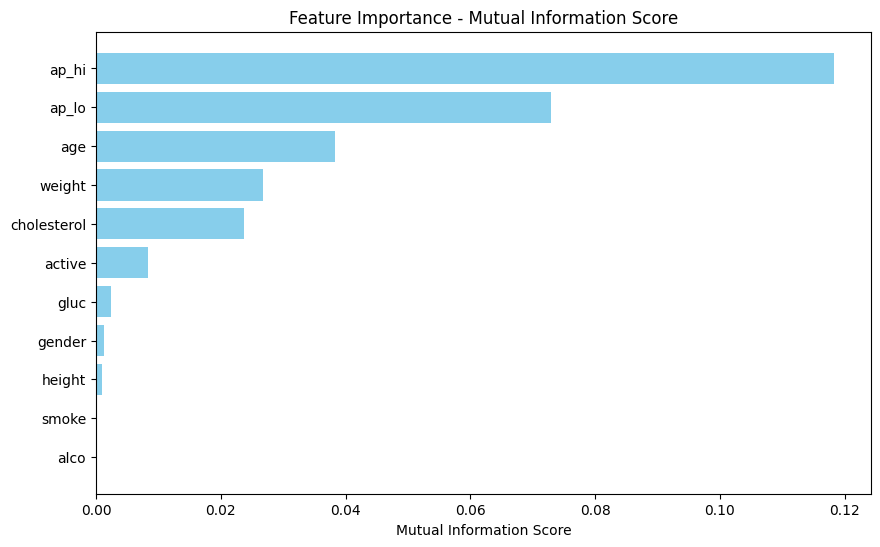

In [16]:
import matplotlib.pyplot as plt


feature_names = [x[0] for x in feature_scores]
scores = [x[1] for x in feature_scores]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance - Mutual Information Score')
plt.gca().invert_yaxis()  
plt.show()

In [14]:
#Removing irrelevant features
irrelevant_features = ['gender','smoke', 'alco','height'] 
x_selected = x_smote.drop(columns=irrelevant_features)
x_selected.head()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,active
0,50,62.0,110,80,1,1,1
1,55,85.0,140,90,3,1,1
2,51,64.0,130,70,3,1,0
3,48,82.0,150,100,1,1,1
4,47,56.0,100,60,1,1,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_selected, y_smote, test_size = 0.20, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, random_state=42)
random_model.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=8, n_estimators=500, random_state=42)

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

random_prediction = random_model.predict(X_test)
print("Random model prediction : \n\n", random_prediction)

print("\n Classification Report : \n", classification_report(y_test, random_prediction) )

print(" Random forest model Accuracy: ", round(accuracy_score(y_test, random_prediction)*100 ,2),"%")

print("\n Confusion matrix: \n " ,confusion_matrix(y_test, random_prediction))

rmse = np.sqrt(metrics.mean_squared_error(y_test, random_prediction))
print("\n\nRMSE value = ", rmse)
r2 = metrics.r2_score(y_test, random_prediction)
print("R2 value = ", r2)
print("Mean Square error = ", metrics.mean_squared_error(y_test, random_prediction))

Random model prediction : 

 [1 1 1 ... 0 1 1]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

 Random forest model Accuracy:  72.79 %

 Confusion matrix: 
  [[5417 1571]
 [2238 4774]]


RMSE value =  0.5216046669379297
R2 value =  -0.08828891252251814
Mean Square error =  0.2720714285714286


In [10]:
# improve the model to get better accuracy
random_model = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=64, random_state=52)
random_model.fit(X_train, y_train)

random_prediction = random_model.predict(X_test)
print("Random model prediction : \n\n", random_prediction)

print("\n Classification Report : \n", classification_report(y_test, random_prediction) )

print(" Random forest model Accuracy: ", round(accuracy_score(y_test, random_prediction)*100 ,2),"%")

print("\n Confusion matrix: \n " ,confusion_matrix(y_test, random_prediction))

rmse = np.sqrt(metrics.mean_squared_error(y_test, random_prediction))
print("\n\nRMSE value = ", rmse)
r2 = metrics.r2_score(y_test, random_prediction)
print("R2 value = ", r2)
print("Mean Square error = ", metrics.mean_squared_error(y_test, random_prediction))


Random model prediction : 

 [1 1 1 ... 0 1 1]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

 Random forest model Accuracy:  73.6 %

 Confusion matrix: 
  [[5382 1606]
 [2090 4922]]


RMSE value =  0.5138093031466052
R2 value =  -0.056003103356058626
Mean Square error =  0.264


In [11]:
random_model = RandomForestClassifier(n_estimators=500, max_depth=86, random_state=52)
random_model.fit(X_train, y_train)

random_prediction = random_model.predict(X_test)
print("Random model prediction : \n\n", random_prediction)

print("\n Classification Report : \n", classification_report(y_test, random_prediction) )

print(" Random forest model Accuracy: ", round(accuracy_score(y_test, random_prediction)*100 ,2),"%")

print("\n Confusion matrix: \n " ,confusion_matrix(y_test, random_prediction))

rmse = np.sqrt(metrics.mean_squared_error(y_test, random_prediction))
print("\n\nRMSE value = ", rmse)
r2 = metrics.r2_score(y_test, random_prediction)
print("R2 value = ", r2)
print("Mean Square error = ", metrics.mean_squared_error(y_test, random_prediction))

Random model prediction : 

 [1 1 1 ... 0 1 1]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      6988
           1       0.71      0.71      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

 Random forest model Accuracy:  71.16 %

 Confusion matrix: 
  [[5001 1987]
 [2051 4961]]


RMSE value =  0.5370554640151903
R2 value =  -0.15371767623153798
Mean Square error =  0.2884285714285714


In [12]:
random_model = RandomForestClassifier(n_estimators=500, max_depth=24, random_state=52)
random_model.fit(X_train, y_train)

random_prediction = random_model.predict(X_test)
print("Random model prediction : \n\n", random_prediction)

print("\n Classification Report : \n", classification_report(y_test, random_prediction) )

print(" Random forest model Accuracy: ", round(accuracy_score(y_test, random_prediction)*100 ,2),"%")

print("\n Confusion matrix: \n " ,confusion_matrix(y_test, random_prediction))

rmse = np.sqrt(metrics.mean_squared_error(y_test, random_prediction))
print("\n\nRMSE value = ", rmse)
r2 = metrics.r2_score(y_test, random_prediction)
print("R2 value = ", r2)
print("Mean Square error = ", metrics.mean_squared_error(y_test, random_prediction))

Random model prediction : 

 [1 1 1 ... 0 1 1]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

 Random forest model Accuracy:  72.71 %

 Confusion matrix: 
  [[5292 1696]
 [2125 4887]]


RMSE value =  0.5224256611505329
R2 value =  -0.09171749402692098
Mean Square error =  0.2729285714285714


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
 
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best estimator
best_rf = grid_search.best_estimator_

best_predictions = best_rf.predict(X_test)
print("Random model prediction : \n\n", random_prediction)

print("\n Classification Report : \n", classification_report(y_test, random_prediction) )

print(" Random forest model Accuracy: ", round(accuracy_score(y_test, random_prediction)*100 ,2),"%")

print("\n Confusion matrix: \n " ,confusion_matrix(y_test, random_prediction))

rmse = np.sqrt(metrics.mean_squared_error(y_test, random_prediction))
print("\n\nRMSE value = ", rmse)
r2 = metrics.r2_score(y_test, random_prediction)
print("R2 value = ", r2)
print("Mean Square error = ", metrics.mean_squared_error(y_test, random_prediction))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.1s
[CV] END m